### Introduction

In this notebook, we have maintly focused on analyzing current_application1.csv i.e., data about current applicaiton of loan

### Approach of Applicaiton Data Analysis

* Importing Module
* Reading the Dataset into Pandas DataFrame
* We have divided the features into small segments and analyzed segment-wise using a smaller dataframe containing only relevant categories.
* Data Cleaning, Missing Data Handling, Type casting are done segment-wise.
* Plots and perncetage wise Defaulter calculation are done segement-wise as well.

### Importing the Modules

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns',None)
plt.style.use('ggplot')

### Reading the dataset

In [2]:
curr_df = pd.read_csv('current_application1.csv')
prev_df = pd.read_csv('previous_application.csv')

In [3]:
prev_df.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.0,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
curr_df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [5]:
curr_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [6]:
prev_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [7]:
print(f'The curr_df data has {curr_df.shape[0]} rows and {curr_df.shape[1]} columns, along with 1 Target variable called TARGET')
print(f'The curr_df data has {prev_df.shape[0]} rows and {prev_df.shape[1]} columns')

The curr_df data has 307511 rows and 122 columns, along with 1 Target variable called TARGET
The curr_df data has 1670214 rows and 37 columns


In [8]:
#writing a function to identify the missing values in the curr_df.

In [9]:
def missing_values_percentage(df):
    missing = pd.DataFrame(columns=['category','percentage'])
    
    for col in df.columns:
        if df[col].isnull().values.any():
            percentage = df[col].isnull().sum()/df[col].shape[0]*100
            missing = missing.append({'category':col,'percentage':percentage},ignore_index=True)
    return missing

In [10]:
import warnings
warnings.filterwarnings('ignore')
missing_values_percentage(curr_df).sort_values(by='percentage',ascending=False)

,category,percentage
41,COMMONAREA_MEDI,69.872297
13,COMMONAREA_AVG,69.872297
27,COMMONAREA_MODE,69.872297
49,NONLIVINGAPARTMENTS_MEDI,69.432963
35,NONLIVINGAPARTMENTS_MODE,69.432963
21,NONLIVINGAPARTMENTS_AVG,69.432963
51,FONDKAPREMONT_MODE,68.386172
33,LIVINGAPARTMENTS_MODE,68.354953
47,LIVINGAPARTMENTS_MEDI,68.354953
19,LIVINGAPARTMENTS_AVG,68.354953


### Checking Data Imbalance

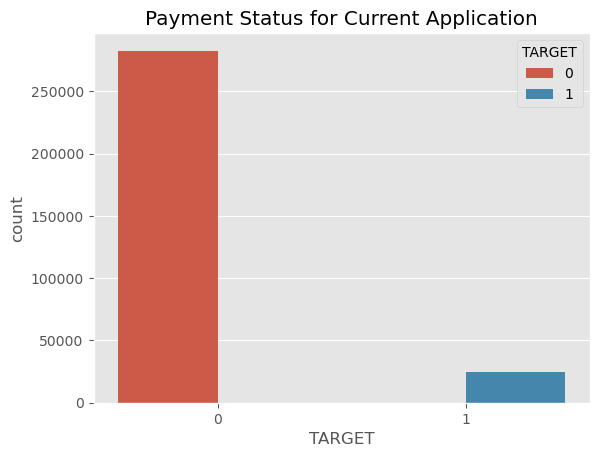

In [11]:
plt.title('Payment Status for Current Application')
sns.countplot(curr_df['TARGET'],hue=curr_df['TARGET'])
plt.show()

### Data Imbalance Ratio

In [12]:
defaulter = curr_df[curr_df['TARGET']==1]
non_defaulter = curr_df[curr_df['TARGET']==0]

print(f'No of defaulter are {defaulter.shape[0]}')
print(f'No of non defaulter are {non_defaulter.shape[0]}')

No of defaulter are 24825
No of non defaulter are 282686


In [13]:
print('percent of defaulters', defaulter.shape[0]/(non_defaulter.shape[0]+defaulter.shape[0])*100)

percent of defaulters 8.072881945686495


* Comment:
    * The data is highly imbalanced as number of defaulters as number of defaulter is very less in total population. Data Imbalance Ratio.
    

### Segment 1: Documents Submitted by Applicant

Here we are Analyzing 'FLAG_DOCUMENT_2','FLAG_DOCUMENT_3',......,'FLAG_DOCUMENT_21' columns. Our goal is to understand whether trend of document submission and identify impact on TARGET variable (if any)

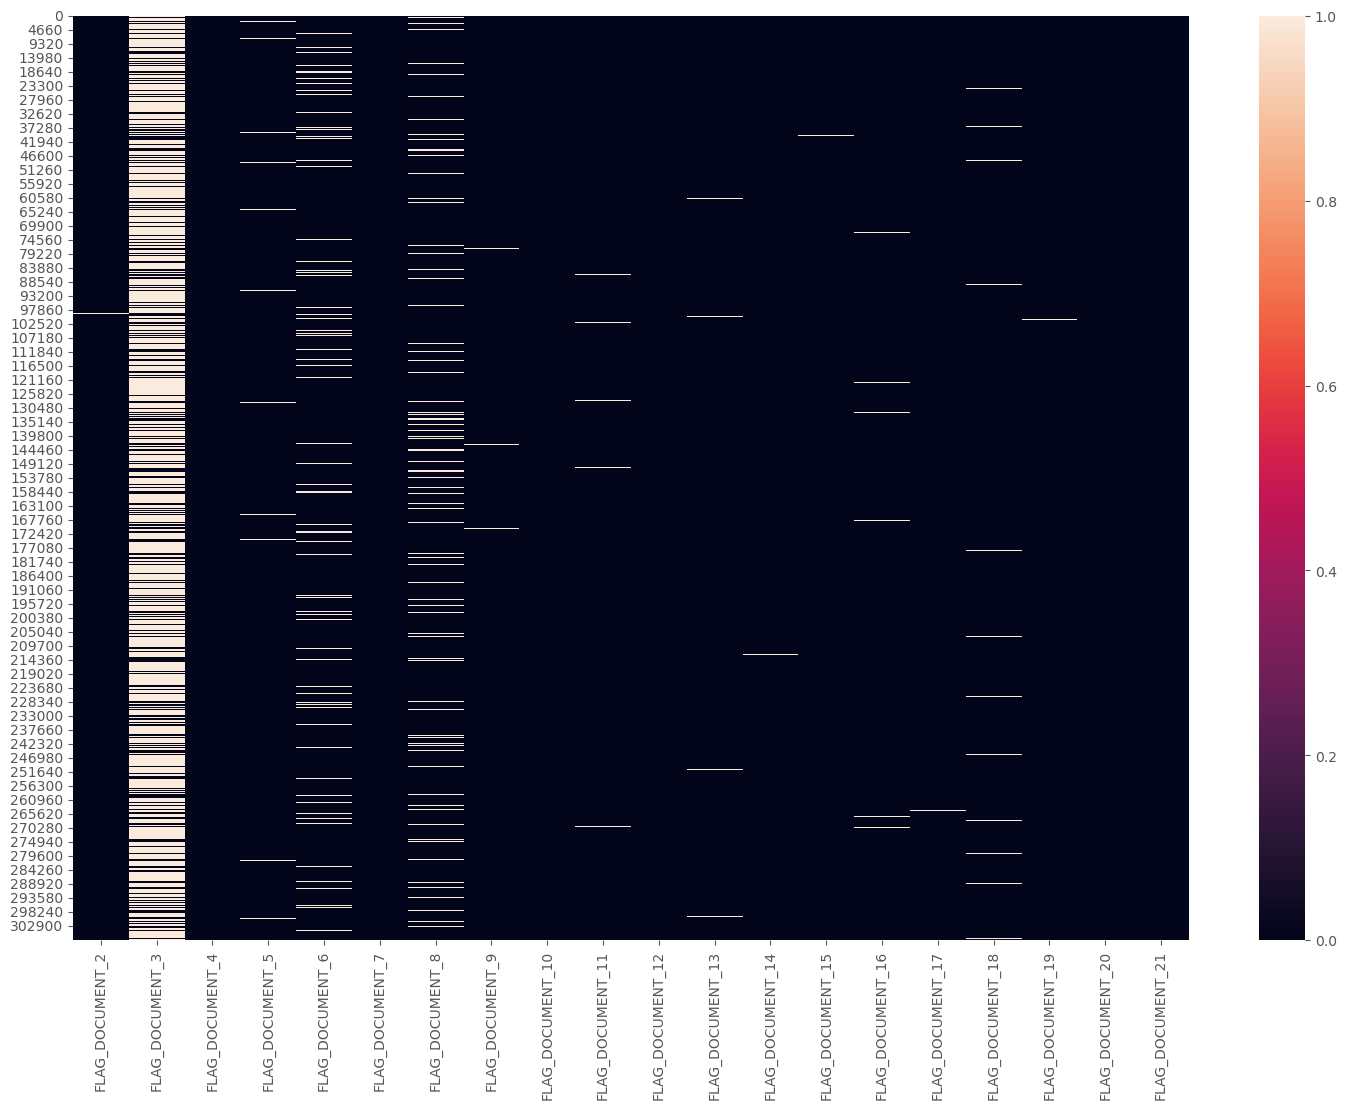

In [14]:
start_index = curr_df.columns.get_loc('FLAG_DOCUMENT_2')
ending_index = curr_df.columns.get_loc('FLAG_DOCUMENT_21')+1

plt.figure(figsize=(18,12))
sns.heatmap(curr_df.iloc[:,start_index:ending_index])
plt.show()

* Comment:
    * The HeatMap suggests that all of the documents except Document 3 were not provided by applicants in majority of the cases.
    * Hence we can assumen all the document (except document 3) will not contribute towards analyzing the data. Hence all this column can be dropped.
    
checking both defaulter and non-defaulter entries to identify importance of Document 3

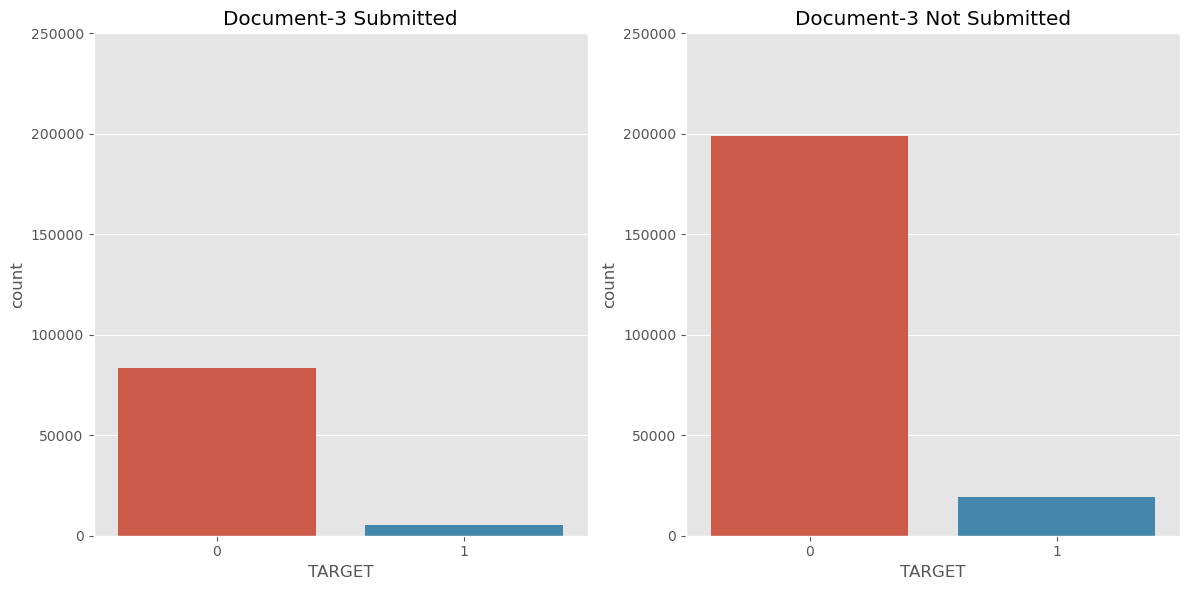

In [15]:
#using equal ylim for better visibility.

fig = plt.figure(figsize=(12,6))

ax1 = fig.add_subplot(1,2,1, ylim = (0,250000),title = 'Document-3 Submitted')
ax2 = fig.add_subplot(1,2,2, ylim = (0,250000),title = 'Document-3 Not Submitted')

sns.countplot(curr_df[curr_df['FLAG_DOCUMENT_3']==0]['TARGET'],ax=ax1)
sns.countplot(curr_df[curr_df['FLAG_DOCUMENT_3']==1]['TARGET'],ax=ax2)

plt.tight_layout()
plt.show()

* Comment:

    * FLAG_DOCUMENT_3 is showing similar trend for both non-defaulters and defaulters.
    * Hence, this column can be dropped.

### Segment 2: Housing Information of Applicant

In [16]:
start_index = curr_df.columns.get_loc('APARTMENTS_AVG')
ending_index = curr_df.columns.get_loc('EMERGENCYSTATE_MODE')

In [17]:
housing_df = curr_df.iloc[:,start_index:ending_index+1]
housing_df['TARGET'] = curr_df['TARGET']
housing_df['NAME_HOUSING_TYPE'] = curr_df['NAME_HOUSING_TYPE']
housing_df.head()

,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,TARGET,NAME_HOUSING_TYPE
0,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,1,House / apartment
1,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,0,House / apartment
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,House / apartment
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,House / apartment
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,House / apartment


In [18]:
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 49 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   APARTMENTS_AVG                151450 non-null  float64
 1   BASEMENTAREA_AVG              127568 non-null  float64
 2   YEARS_BEGINEXPLUATATION_AVG   157504 non-null  float64
 3   YEARS_BUILD_AVG               103023 non-null  float64
 4   COMMONAREA_AVG                92646 non-null   float64
 5   ELEVATORS_AVG                 143620 non-null  float64
 6   ENTRANCES_AVG                 152683 non-null  float64
 7   FLOORSMAX_AVG                 154491 non-null  float64
 8   FLOORSMIN_AVG                 98869 non-null   float64
 9   LANDAREA_AVG                  124921 non-null  float64
 10  LIVINGAPARTMENTS_AVG          97312 non-null   float64
 11  LIVINGAREA_AVG                153161 non-null  float64
 12  NONLIVINGAPARTMENTS_AVG       93997 non-null

In [19]:
missing_values_percentage(housing_df).sort_values(by='percentage',ascending=False)

,category,percentage
32,COMMONAREA_MEDI,69.872297
4,COMMONAREA_AVG,69.872297
18,COMMONAREA_MODE,69.872297
26,NONLIVINGAPARTMENTS_MODE,69.432963
40,NONLIVINGAPARTMENTS_MEDI,69.432963
12,NONLIVINGAPARTMENTS_AVG,69.432963
42,FONDKAPREMONT_MODE,68.386172
38,LIVINGAPARTMENTS_MEDI,68.354953
24,LIVINGAPARTMENTS_MODE,68.354953
10,LIVINGAPARTMENTS_AVG,68.354953


* Comment:
    * All of the feature columns in housing_df have more than 47%-70% of missing data, hence all these columns will be dropped.

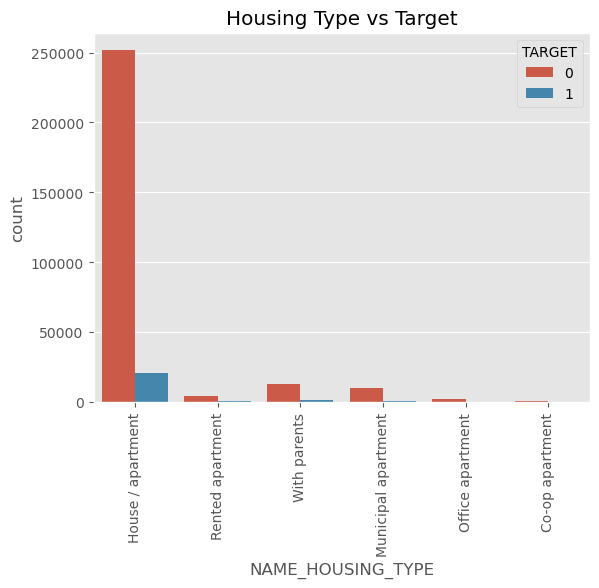

In [20]:
plt.figure()
sns.countplot(curr_df['NAME_HOUSING_TYPE'],hue=curr_df['TARGET'])
plt.xticks(rotation=90)
plt.title('Housing Type vs Target')
plt.show()

In [21]:
#creating a user defined function to find out the percentage of defaulters according to the featuresb

In [22]:
def default_percentage(df,col):
    new_df = pd.DataFrame(columns = ['category','percentage'])
    
    for Value in df[col].unique():
        default_cnt = df[(df[col] == Value) & (df['TARGET'] == 1)].shape[0]
        total_cnt = df[df[col]==Value].shape[0]
        
        new_df = new_df.append({'category':Value,'percentage': (default_cnt/total_cnt*100)},ignore_index=True)
    return new_df.sort_values(by='percentage',ascending=False)

In [23]:
default_percentage(curr_df,'NAME_HOUSING_TYPE')

,category,percentage
1,Rented apartment,12.313051
2,With parents,11.698113
3,Municipal apartment,8.539748
5,Co-op apartment,7.932264
0,House / apartment,7.795711
4,Office apartment,6.572411


* Comment:
    * Most of the applicants live in House/Apartment.
    * Applicants living With Parents or Rented Apartment having higher rate of default.
    

### Segment 3: Social Circle Info

In [24]:
start_index = curr_df.columns.get_loc('OBS_30_CNT_SOCIAL_CIRCLE')
ending_index = curr_df.columns.get_loc('DEF_60_CNT_SOCIAL_CIRCLE')

social_circle_df = curr_df.iloc[:,start_index:ending_index+1]

In [25]:
social_circle_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 4 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   OBS_30_CNT_SOCIAL_CIRCLE  306490 non-null  float64
 1   DEF_30_CNT_SOCIAL_CIRCLE  306490 non-null  float64
 2   OBS_60_CNT_SOCIAL_CIRCLE  306490 non-null  float64
 3   DEF_60_CNT_SOCIAL_CIRCLE  306490 non-null  float64
dtypes: float64(4)
memory usage: 9.4 MB


In [26]:
social_circle_df.describe()

,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE
count,306490.000000,306490.000000,306490.000000,306490.000000
mean,1.422245,0.143421,1.405292,0.100049
std,2.400989,0.446698,2.379803,0.362291
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000
75%,2.000000,0.000000,2.000000,0.000000
max,348.000000,34.000000,344.000000,24.000000


<AxesSubplot:>

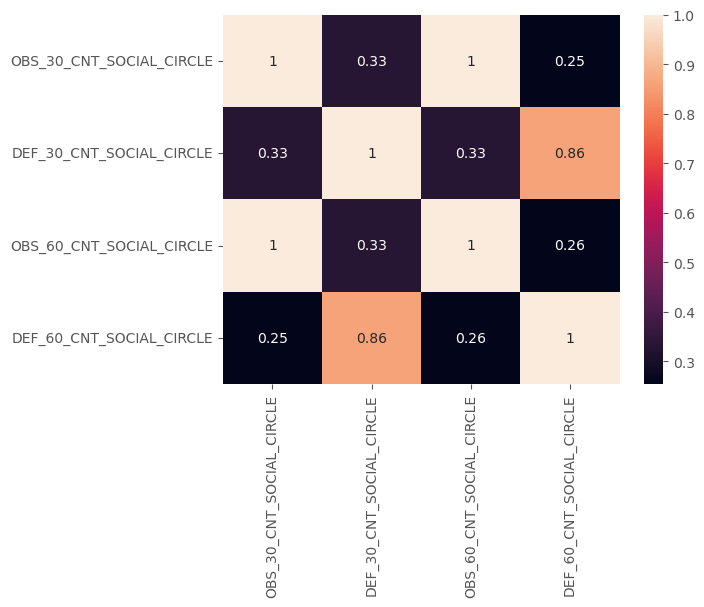

In [27]:
sns.heatmap(social_circle_df.corr(),annot=True)

* Comment:
    * DEF_30_CNT_SOCIAL_CIRCLE and DEF_60_CNT_SOCIAL_CIRCLE are highly correlated.
    * OBS_30_CNT_SOCIAL_CIRCLE and OBS_60_CNT_SOCIAL_CIRCLE are negatively correlated.

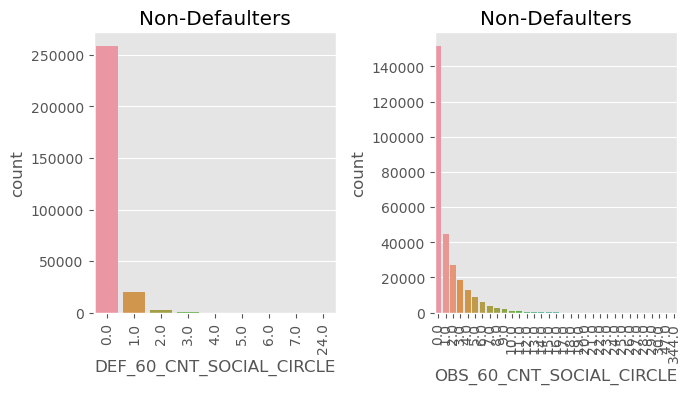

In [28]:
fig=plt.subplots(figsize=(7,7))

for i,j in enumerate(['DEF_60_CNT_SOCIAL_CIRCLE','OBS_60_CNT_SOCIAL_CIRCLE']):
    plt.subplot(2,2,i+1)
    plt.subplots_adjust(hspace=1.0)
    sns.countplot(j,data=non_defaulter)
    plt.title('Non-Defaulters')
    plt.xticks(rotation=90)
    plt.tight_layout()

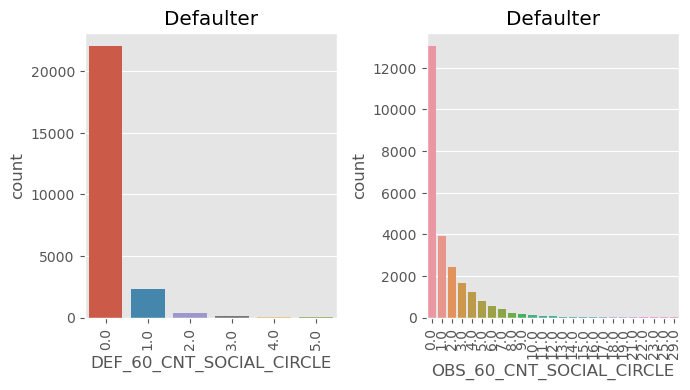

In [29]:
fig = plt.subplots(figsize=(7,7))

for i,j in enumerate(['DEF_60_CNT_SOCIAL_CIRCLE','OBS_60_CNT_SOCIAL_CIRCLE']):
    plt.subplot(2,2,i+1)
    plt.subplots_adjust(hspace=1.0)
    sns.countplot(j,data=defaulter)
    plt.title('Defaulter')
    plt.xticks(rotation=90)
    plt.tight_layout()

* Comment:
    * For Defaulter and Non-Defaulter 'DEF_60_CNT_SOCIAL_CIRCLE','OBS_60_CNT_SOCIAL_CIRCLE' features show similar trend.

### Segment 4: Region related data

In [30]:
start_index = curr_df.columns.get_loc('REG_REGION_NOT_LIVE_REGION')
ending_index = curr_df.columns.get_loc('LIVE_CITY_NOT_WORK_CITY')

region_df = curr_df.iloc[:,start_index:ending_index+1]

In [31]:
region_df['REGION_RATING_CLIENT'] = curr_df['REGION_RATING_CLIENT']
region_df['REGION_RATING_CLIENT_W_CITY'] = curr_df['REGION_RATING_CLIENT_W_CITY']
region_df['TARGET'] = curr_df['TARGET']

In [32]:
region_df.head()

,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,TARGET
0,0,0,0,0,0,0,2,2,1
1,0,0,0,0,0,0,1,1,0
2,0,0,0,0,0,0,2,2,0
3,0,0,0,0,0,0,2,2,0
4,0,0,0,0,1,1,2,2,0


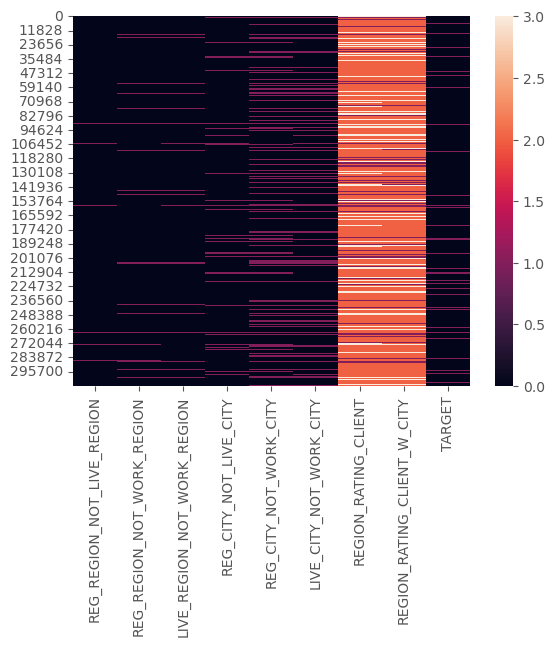

In [33]:
sns.heatmap(region_df)
plt.show()

* Comment:
    - All Features are labeled as 0 and 1
    - REG_REGION_NOT_LIVE_REGION mostly contains 0, hence can be removed.
    - REG_REGION_NOT_WORK_REGION, LIVE_REGION_NOT_WORK_REGION columns are identical, hence one of them can be removed.
    - REG_CITY_NOT_WORK_CITY, LIVE_CITY_NOT_WORK_CITY columns are identical, hence one of them can be removed.

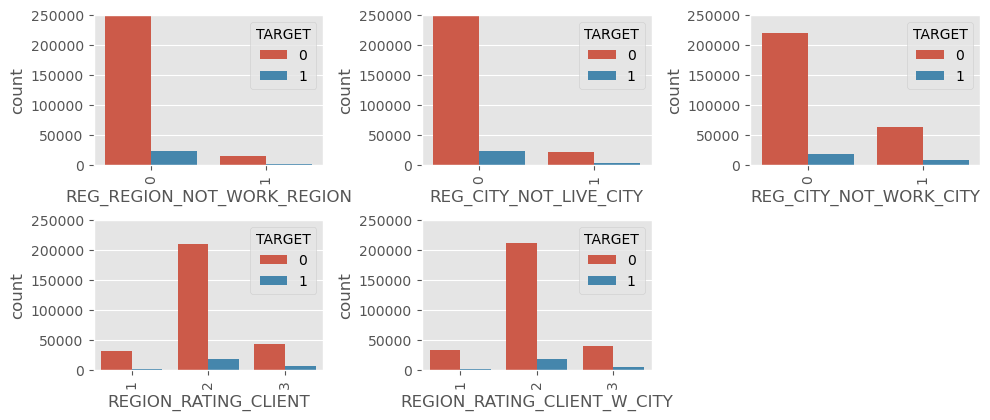

In [34]:
fig = plt.subplots(figsize=(10,10))

for i, j in enumerate(['REG_REGION_NOT_WORK_REGION',
                       'REG_CITY_NOT_LIVE_CITY', 
                       'REG_CITY_NOT_WORK_CITY',
                       'REGION_RATING_CLIENT', 
                       'REGION_RATING_CLIENT_W_CITY']):
    
    plt.subplot(5,3,i+1,ylim=(0,250000))
    plt.subplots_adjust(hspace=1.0)
    sns.countplot(curr_df[j],hue=curr_df['TARGET'])
    plt.xticks(rotation=90)
    plt.tight_layout()

* Comment:
    * Defaulter rate is highest when REG_REGION_NOT_WORK_REGION=0 i.e. permanent address and working address is same
    * Highest Applicants have Region rating of 2

### Segment 5: Contract Related Info

In [35]:
contact_df = curr_df[['FLAG_MOBIL','FLAG_EMP_PHONE','FLAG_WORK_PHONE','FLAG_CONT_MOBILE','FLAG_PHONE','FLAG_EMAIL','DAYS_LAST_PHONE_CHANGE', 'TARGET']]

In [36]:
contact_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 8 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   FLAG_MOBIL              307511 non-null  int64  
 1   FLAG_EMP_PHONE          307511 non-null  int64  
 2   FLAG_WORK_PHONE         307511 non-null  int64  
 3   FLAG_CONT_MOBILE        307511 non-null  int64  
 4   FLAG_PHONE              307511 non-null  int64  
 5   FLAG_EMAIL              307511 non-null  int64  
 6   DAYS_LAST_PHONE_CHANGE  307510 non-null  float64
 7   TARGET                  307511 non-null  int64  
dtypes: float64(1), int64(7)
memory usage: 18.8 MB


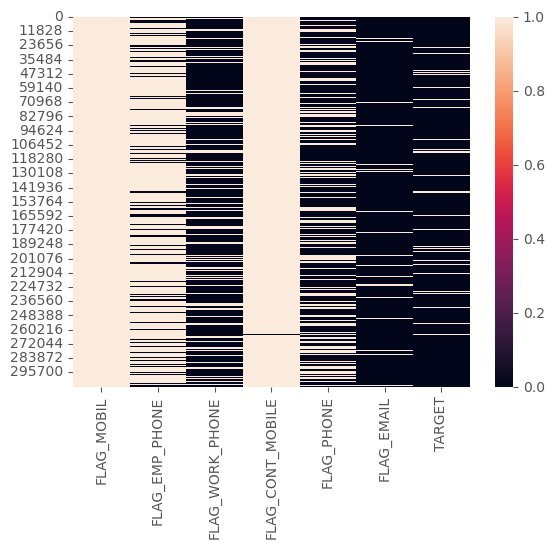

In [37]:
plt.figure()
sns.heatmap(contact_df.drop('DAYS_LAST_PHONE_CHANGE',axis=1))
plt.show()

### Segment 6: Asset Details

In [38]:
curr_df[['FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'OWN_CAR_AGE', 'TARGET']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 4 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   FLAG_OWN_CAR     307511 non-null  object 
 1   FLAG_OWN_REALTY  307511 non-null  object 
 2   OWN_CAR_AGE      104582 non-null  float64
 3   TARGET           307511 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 9.4+ MB


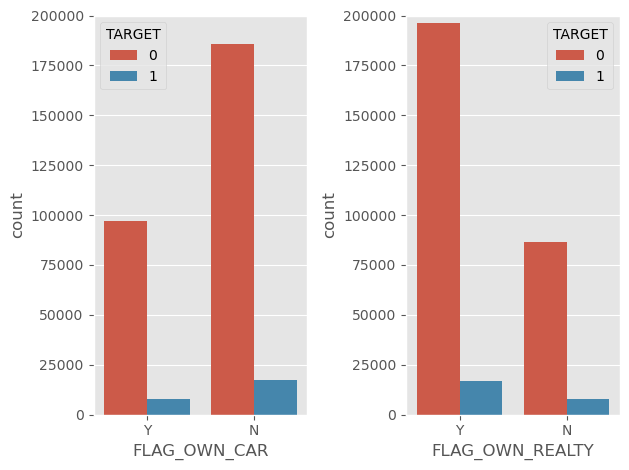

In [39]:
fig = plt.figure()

ax1 = fig.add_subplot(1,2,1,ylim=(0,200000))
ax2 = fig.add_subplot(1,2,2,ylim=(0,200000))

sns.countplot(curr_df['FLAG_OWN_CAR'],hue=curr_df['TARGET'],order=['Y','N'],ax=ax1)
sns.countplot(curr_df['FLAG_OWN_REALTY'],hue=curr_df['TARGET'],order=['Y','N'],ax=ax2)

plt.tight_layout()
plt.show()

In [40]:
default_percentage(curr_df,'FLAG_OWN_CAR')

,category,percentage
0,N,8.500227
1,Y,7.243730


In [41]:
default_percentage(curr_df, 'FLAG_OWN_REALTY')

,category,percentage
1,N,8.324929
0,Y,7.961577


* Comment:
    * Most of the applicants own realty.
    * Most of the applicants do not own cars.
    * People not owning reality and car and have a slightly higher default rate than the people who own reality and car.

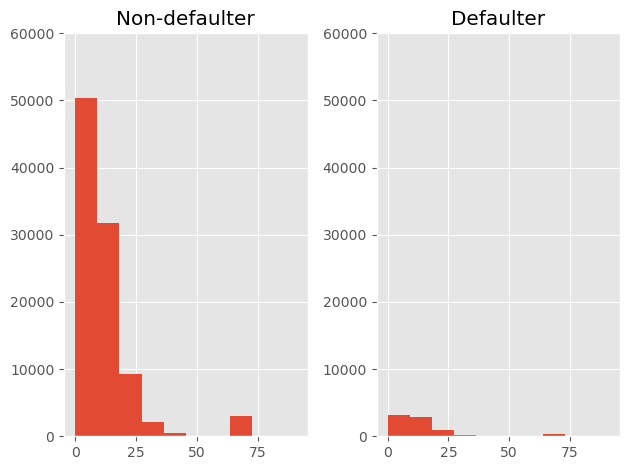

In [42]:
fig = plt.figure()

ax1 = fig.add_subplot(1,2,1,ylim=(0,60000),title='Non-defaulter')
ax2 = fig.add_subplot(1,2,2,ylim=(0,60000),title='Defaulter')

non_defaulter['OWN_CAR_AGE'].hist(bins=10,ax=ax1)
defaulter['OWN_CAR_AGE'].hist(bins=10,ax=ax2)

plt.tight_layout()
plt.show()


* Comment:
    * Defaulter or not, most applicants have car age between 0-25 years.
    * Since for both taregt value, trend is similar, this feature can dropped.

### Segment 7: Family Related Info

In [43]:
curr_df[['CNT_CHILDREN', 'CNT_FAM_MEMBERS', 'NAME_FAMILY_STATUS']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 3 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   CNT_CHILDREN        307511 non-null  int64  
 1   CNT_FAM_MEMBERS     307509 non-null  float64
 2   NAME_FAMILY_STATUS  307511 non-null  object 
dtypes: float64(1), int64(1), object(1)
memory usage: 7.0+ MB


In [44]:
# dropping the rows(2) with null value in CNT_FAM_MEMBERS

curr_df = curr_df.dropna(subset=['CNT_FAM_MEMBERS'])
curr_df[['CNT_CHILDREN', 'CNT_FAM_MEMBERS', 'NAME_FAMILY_STATUS']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 307509 entries, 0 to 307510
Data columns (total 3 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   CNT_CHILDREN        307509 non-null  int64  
 1   CNT_FAM_MEMBERS     307509 non-null  float64
 2   NAME_FAMILY_STATUS  307509 non-null  object 
dtypes: float64(1), int64(1), object(1)
memory usage: 9.4+ MB


In [45]:
# Since number of family member cannot have fraction, coverting to Integer.

curr_df['CNT_FAM_MEMBERS'] = curr_df['CNT_FAM_MEMBERS'].astype(int)

curr_df['CNT_FAM_MEMBERS'].info()

<class 'pandas.core.series.Series'>
Int64Index: 307509 entries, 0 to 307510
Series name: CNT_FAM_MEMBERS
Non-Null Count   Dtype
--------------   -----
307509 non-null  int32
dtypes: int32(1)
memory usage: 3.5 MB


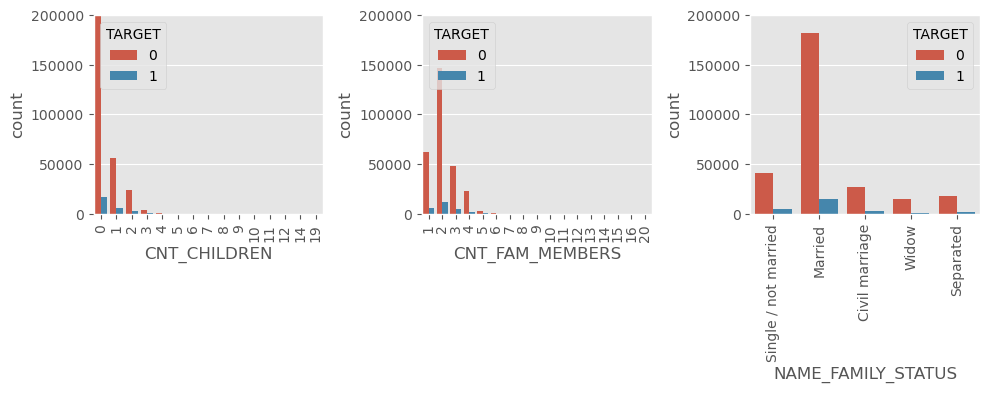

In [46]:
fig = plt.subplots(figsize=(10,10))

for i,j in enumerate(['CNT_CHILDREN','CNT_FAM_MEMBERS','NAME_FAMILY_STATUS']):
    plt.subplot(3,3,i+1,ylim=(0,200000))
    plt.subplots_adjust(hspace=1.0)
    sns.countplot(curr_df[j],hue=curr_df['TARGET'])
    plt.xticks(rotation=90)
    plt.tight_layout()

In [47]:
default_percentage(curr_df,'NAME_FAMILY_STATUS')

,category,percentage
2,Civil marriage,9.944584
0,Single / not married,9.807675
4,Separated,8.194234
1,Married,7.559868
3,Widow,5.824217


In [48]:
default_percentage(curr_df,'CNT_CHILDREN')

,category,percentage
9,9.0,100.000000
10,11.0,100.000000
7,6.0,28.571429
4,4.0,12.820513
3,3.0,9.631423
1,1.0,8.923575
2,2.0,8.721821
6,5.0,8.333333
0,0.0,7.711881
5,7.0,0.000000


In [49]:
default_percentage(curr_df,'CNT_FAM_MEMBERS')

,category,percentage
16,11.0,100.000000
10,13.0,100.000000
9,10.0,33.333333
8,8.0,30.000000
5,6.0,13.480392
4,5.0,9.401955
2,3.0,8.760290
3,4.0,8.648824
0,1.0,8.364408
1,2.0,7.583498


In [50]:
curr_df['CNT_CHILDREN'].value_counts()

0     215369
1      61119
2      26749
3       3717
4        429
5         84
6         21
7          7
14         3
8          2
9          2
12         2
10         2
19         2
11         1
Name: CNT_CHILDREN, dtype: int64

In [51]:
default_percentage(curr_df,'CNT_FAM_MEMBERS')

,category,percentage
16,11.0,100.000000
10,13.0,100.000000
9,10.0,33.333333
8,8.0,30.000000
5,6.0,13.480392
4,5.0,9.401955
2,3.0,8.760290
3,4.0,8.648824
0,1.0,8.364408
1,2.0,7.583498


* Comment:
    * Default Rate is highest for Civil Marriage and Single applicants.
    * Most of the applicants are married (and/or) no children (and/or) 2 family members.
    * Applicants with relatively more number of children (and/or) family members have higher default percentage.
    * For some of the cases where count children/family members is high, and the default rate is very high or very low.
    
This cases cannot be taken as a conclusion as number of applicants having a large family is very low.



### Segment 8: Education and Occupation Info


In [52]:
curr_df['NAME_INCOME_TYPE'].value_counts()

Working                 158774
Commercial associate     71615
Pensioner                55362
State servant            21703
Unemployed                  22
Student                     18
Businessman                 10
Maternity leave              5
Name: NAME_INCOME_TYPE, dtype: int64

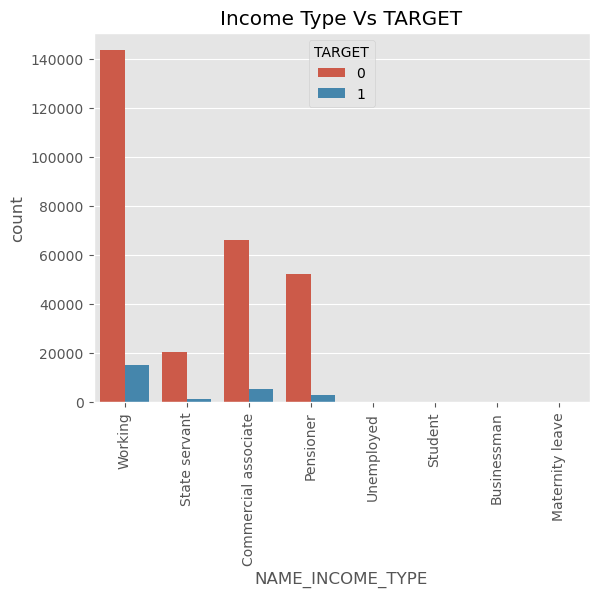

In [53]:
plt.figure()
sns.countplot(curr_df['NAME_INCOME_TYPE'],hue=curr_df['TARGET'])
plt.xticks(rotation=90)
plt.title('Income Type Vs TARGET')
plt.show()

In [54]:
default_percentage(curr_df,'NAME_INCOME_TYPE')

,category,percentage
7,Maternity leave,40.000000
4,Unemployed,36.363636
0,Working,9.588472
2,Commercial associate,7.484466
1,State servant,5.754965
3,Pensioner,5.386366
5,Student,0.000000
6,Businessman,0.000000


* Comment:
    * Most of the applicants are working.
    * The highest defaulter is from 'Maternity leave' and 'Unemployed'.
    * The lowest defaulter is from 'Businessman' and 'Student'.
    
 However applicants of income type('Unemployed', 'Student', 'Businessman', 'Maternity leave') are very few in the dataset to contribute in the analysis.

In [55]:
default_percentage(curr_df,'NAME_EDUCATION_TYPE')

,category,percentage
3,Lower secondary,10.930537
0,Secondary / secondary special,8.939929
2,Incomplete higher,8.484966
1,Higher education,5.355187
4,Academic degree,1.829268


* Comment:
    * Applicants having "Lower secondary" education have highest percentage of Defaulter.


In [56]:
curr_df['OCCUPATION_TYPE'].isnull().value_counts()

False    211118
True      96391
Name: OCCUPATION_TYPE, dtype: int64

In [57]:
curr_df['OCCUPATION_TYPE'].value_counts()

Laborers                 55186
Sales staff              32102
Core staff               27570
Managers                 21370
Drivers                  18603
High skill tech staff    11380
Accountants               9812
Medicine staff            8537
Security staff            6721
Cooking staff             5946
Cleaning staff            4653
Private service staff     2652
Low-skill Laborers        2093
Waiters/barmen staff      1348
Secretaries               1305
Realty agents              751
HR staff                   563
IT staff                   526
Name: OCCUPATION_TYPE, dtype: int64

In [58]:
# Imputing missing value for OCCUPATION TYPE as "Unknown"

curr_df['OCCUPATION_TYPE'].fillna('Unknown',inplace=True)

In [59]:
curr_df['OCCUPATION_TYPE'].isnull().value_counts()

False    307509
Name: OCCUPATION_TYPE, dtype: int64

In [60]:
default_percentage(curr_df,'OCCUPATION_TYPE')

,category,percentage
14,Low-skill Laborers,17.152413
5,Drivers,11.326130
13,Waiters/barmen staff,11.275964
11,Security staff,10.742449
0,Laborers,10.578770
8,Cooking staff,10.443996
6,Sales staff,9.631799
7,Cleaning staff,9.606705
15,Realty agents,7.856192
16,Secretaries,7.049808


* Comment:
    * Low skilled labourers have very high rate of defaulters in comparison to other occupations.

In [61]:
curr_df['CODE_GENDER'].isnull().sum()

0

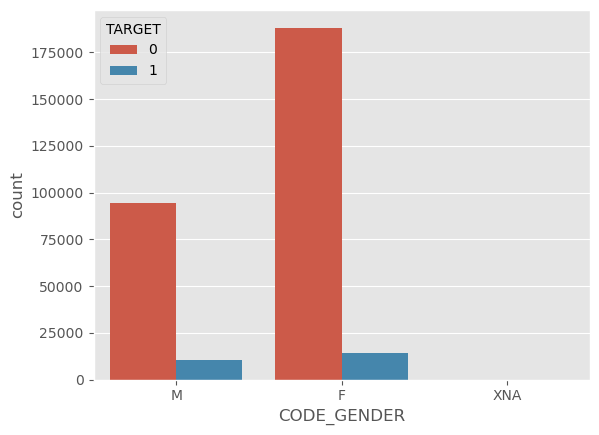

In [62]:
sns.countplot(curr_df['CODE_GENDER'],hue=curr_df['TARGET'])
plt.show()

* Comment:
    * Female applicants are more than male applicants
    * Defaulter percentage is higher for male applicants

In [66]:
# Converting DAYS_BIRTH to age.

curr_df['Age'] = curr_df['DAYS_BIRTH']//(-365.25)
curr_df[['Age']].describe()

,Age
count,307509.000000
mean,43.405198
std,11.945793
min,20.000000
25%,33.000000
50%,43.000000
75%,53.000000
max,69.000000


In [67]:
# Dropping the column as new column will be used for analysis

curr_df.drop(columns=['DAYS_BIRTH'],inplace=True)

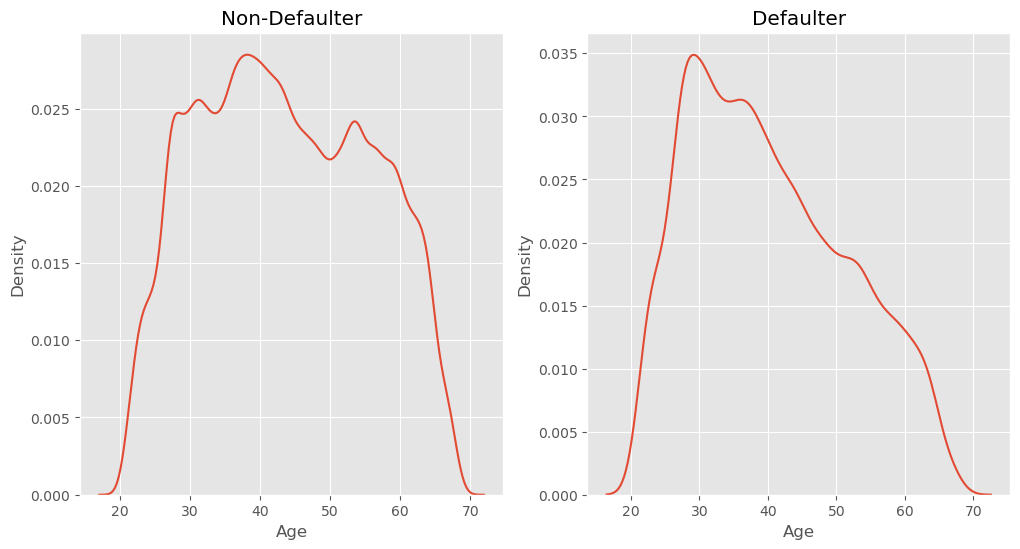

In [69]:
fig = plt.figure(figsize=(12,6))

ax1 = fig.add_subplot(1,2,1, title = 'Non-Defaulter')
ax2 = fig.add_subplot(1,2,2, title = 'Defaulter')

sns.kdeplot(curr_df[curr_df['TARGET']==0]['Age'],ax=ax1)
sns.kdeplot(curr_df[curr_df['TARGET']==1]['Age'],ax=ax2)

plt.show()

* Comment:
    * Age between 30-35 the Defaulters are high.
    * Post Age 40-55 we are seeing a slight decline in defaulters.

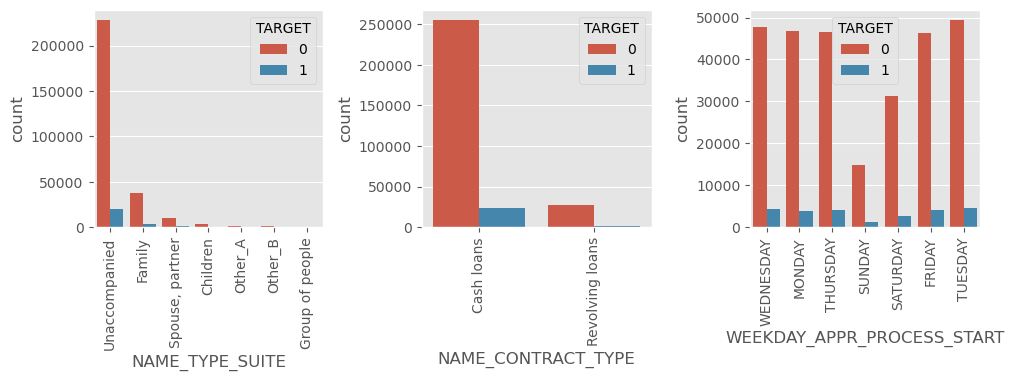

In [71]:
fig = plt.figure(figsize=(10,10))

for i,j in enumerate(['NAME_TYPE_SUITE','NAME_CONTRACT_TYPE','WEEKDAY_APPR_PROCESS_START']):
    plt.subplot(3,3,i+1)
    plt.subplots_adjust(hspace=1.0)
    sns.countplot(curr_df[j],hue=curr_df['TARGET'])
    plt.xticks(rotation = 90)
    plt.tight_layout()

* Comment:
    * Most of the Applicants are Unaccompained while applying for loan.
    * Cash Loans are more than the Resolving Loans.
    * All working days have similar number of applicants than weekend (saturday,sunday)

### Income and Annuity

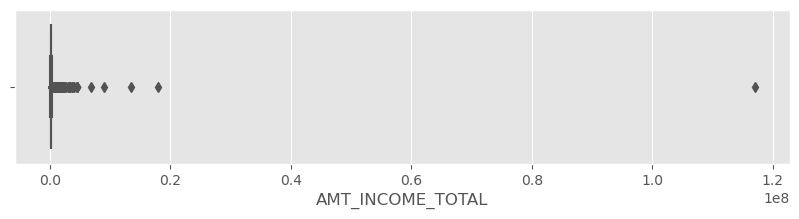

In [72]:
plt.figure(figsize=(10,2))

sns.boxplot(curr_df['AMT_INCOME_TOTAL'])
plt.show()

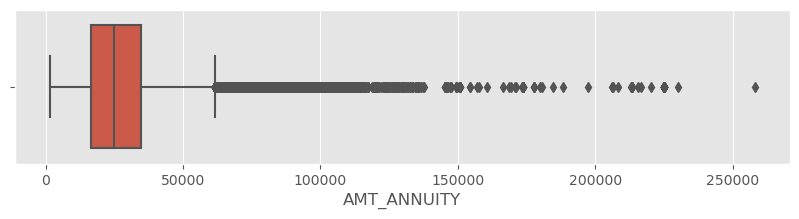

In [73]:
plt.figure(figsize=(10,2))

sns.boxplot(curr_df['AMT_ANNUITY'])
plt.show()

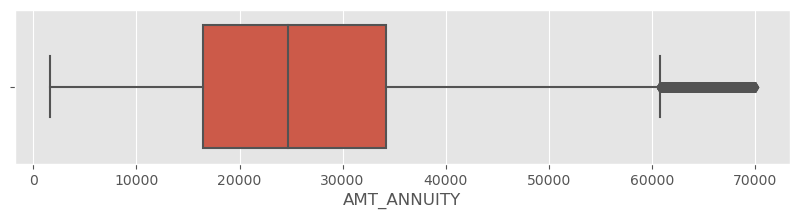

In [78]:
# Box-Plot is showing the outliers for Income and Annuity column, there are few entries 
#  having very large Income and Annuity than others.

# Excluding values outside 99 percentile for AMT_ANNUITY.
exclude = curr_df['AMT_ANNUITY'][curr_df['AMT_ANNUITY']<np.nanpercentile(curr_df['AMT_ANNUITY'],99)]
plt.figure(figsize=(10,2))


sns.boxplot(exclude)
plt.show()

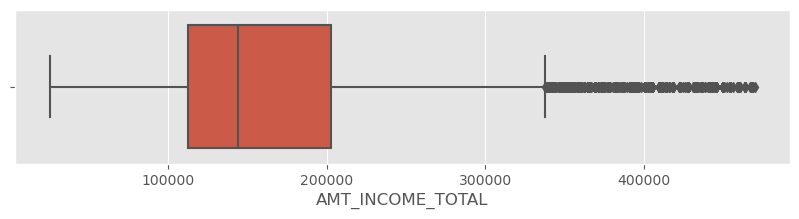

In [79]:
# Excluding values outside 99 percentile for AMT_INCOME_TOTAL.
exclude = curr_df['AMT_INCOME_TOTAL'][curr_df['AMT_INCOME_TOTAL']<np.nanpercentile(curr_df['AMT_INCOME_TOTAL'],99)]
plt.figure(figsize=(10,2))


sns.boxplot(exclude)
plt.show()

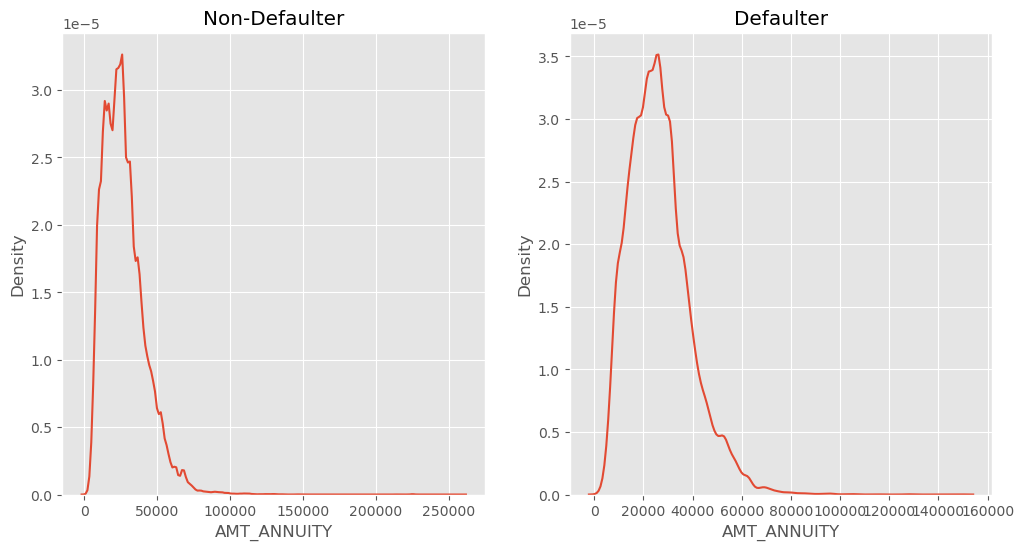

In [88]:
fig = plt.figure(figsize=(12,6))

ax1 = fig.add_subplot(1,2,1, title = 'Non-Defaulter')
ax2 = fig.add_subplot(1,2,2, title = 'Defaulter')

sns.kdeplot(curr_df[curr_df['TARGET']==0]['AMT_ANNUITY'],ax=ax1)
sns.kdeplot(curr_df[curr_df['TARGET']==1]['AMT_ANNUITY'],ax=ax2)

plt.show()

* Comment:
    * For Defaulters and non-defaulters AMT_ANNUITY distribution is similar

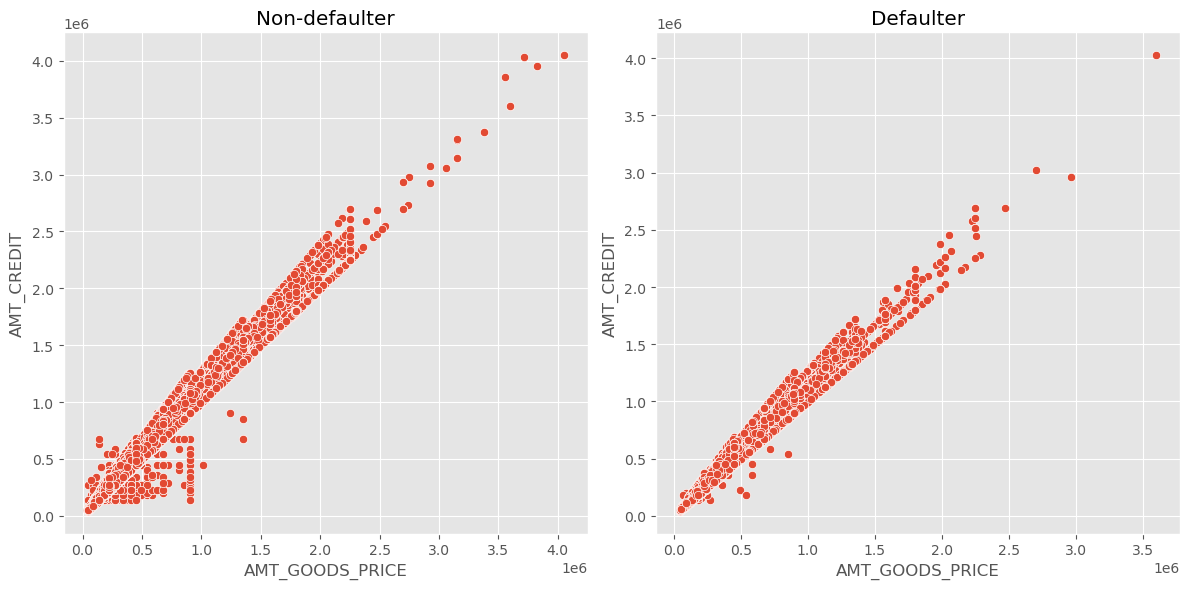

In [90]:
fig = plt.figure(figsize=(12,6))

ax1 = fig.add_subplot(1, 2, 1, title="Non-defaulter")
ax2 = fig.add_subplot(1, 2, 2, title="Defaulter")

sns.scatterplot(curr_df[curr_df["TARGET"] == 0]['AMT_GOODS_PRICE'], curr_df[curr_df["TARGET"] == 0]['AMT_CREDIT'], ax=ax1)
sns.scatterplot(curr_df[curr_df["TARGET"] == 1]['AMT_GOODS_PRICE'], curr_df[curr_df["TARGET"] == 1]['AMT_CREDIT'], ax=ax2)

plt.tight_layout()
plt.show()

* Comment:
    * AMT_CREDIT is having a linear relationship with AMT_GOODS_PRICE for bothe Non-Defaulter and Defaulter.
    * For lower range of AMT_CREDIT and AMT_GOODS_PRICE, amount of defaulters is less than that of non-defaulters


### Top 10 correlation for Defaulters

In [94]:
defaulter_corr  = defaulter.corr()
round(defaulter_corr,2)

corr_list = defaulter_corr.unstack()

In [95]:
# Listing the correlations in pair sorted in descending order
corr_list.sort_values(ascending=False).drop_duplicates().head(11)

SK_ID_CURR                SK_ID_CURR                  1.000000
OBS_60_CNT_SOCIAL_CIRCLE  OBS_30_CNT_SOCIAL_CIRCLE    0.998269
BASEMENTAREA_AVG          BASEMENTAREA_MEDI           0.998250
COMMONAREA_MEDI           COMMONAREA_AVG              0.998107
YEARS_BUILD_MEDI          YEARS_BUILD_AVG             0.998100
NONLIVINGAPARTMENTS_AVG   NONLIVINGAPARTMENTS_MEDI    0.998075
FLOORSMIN_MEDI            FLOORSMIN_AVG               0.997825
LIVINGAPARTMENTS_MEDI     LIVINGAPARTMENTS_AVG        0.997668
FLOORSMAX_MEDI            FLOORSMAX_AVG               0.997187
NONLIVINGAPARTMENTS_MODE  NONLIVINGAPARTMENTS_MEDI    0.997032
ENTRANCES_MEDI            ENTRANCES_AVG               0.996700
dtype: float64

In [98]:
non_defaulter_corr = non_defaulter.corr()
round(non_defaulter_corr,2)

non_corr_list = non_defaulter_corr.unstack()

In [99]:
# Listing the correlations in pair sorted in descending order
non_corr_list.sort_values(ascending=False).drop_duplicates().head(11)

SK_ID_CURR                SK_ID_CURR                  1.000000
YEARS_BUILD_AVG           YEARS_BUILD_MEDI            0.998522
OBS_60_CNT_SOCIAL_CIRCLE  OBS_30_CNT_SOCIAL_CIRCLE    0.998508
FLOORSMIN_MEDI            FLOORSMIN_AVG               0.997202
FLOORSMAX_AVG             FLOORSMAX_MEDI              0.997018
ENTRANCES_AVG             ENTRANCES_MEDI              0.996899
ELEVATORS_AVG             ELEVATORS_MEDI              0.996161
COMMONAREA_AVG            COMMONAREA_MEDI             0.995857
LIVINGAREA_MEDI           LIVINGAREA_AVG              0.995568
APARTMENTS_AVG            APARTMENTS_MEDI             0.995163
BASEMENTAREA_MEDI         BASEMENTAREA_AVG            0.994081
dtype: float64

* Top 10 Correlations for Defaulters
1. (OBS_60_CNT_SOCIAL_CIRCLE, OBS_30_CNT_SOCIAL_CIRCLE)
2. (BASEMENTAREA_AVG, BASEMENTAREA_MEDI)
3. (YEARS_BUILD_AVG, YEARS_BUILD_MEDI)
4. (COMMONAREA_MEDI, COMMONAREA_AVG)
5. (FLOORSMIN_AVG, FLOORSMIN_MEDI)
6. (NONLIVINGAPARTMENTS_MEDI, NONLIVINGAPARTMENTS_AVG)
7. (LIVINGAPARTMENTS_MEDI, LIVINGAPARTMENTS_AVG)
8. (NONLIVINGAPARTMENTS_MEDI, NONLIVINGAPARTMENTS_MODE)
9. (FLOORSMAX_AVG, FLOORSMAX_MEDI)
10. (ENTRANCES_AVG, ENTRANCES_MEDI)

* Top 10 Correlations for Non-Defaulters
1. (YEARS_BUILD_AVG, YEARS_BUILD_MEDI)
2. (OBS_30_CNT_SOCIAL_CIRCLE, OBS_60_CNT_SOCIAL_CIRCLE)
3. (FLOORSMIN_AVG, FLOORSMIN_MEDI)
4. (FLOORSMAX_AVG, FLOORSMAX_MEDI)
5. (ENTRANCES_AVG, ENTRANCES_MEDI)
6. (ELEVATORS_AVG, ELEVATORS_MEDI)
7. (COMMONAREA_MEDI, COMMONAREA_AVG)
8. (LIVINGAREA_AVG, LIVINGAREA_MEDI)
9. (APARTMENTS_MEDI, APARTMENTS_AVG)
10. (BASEMENTAREA_AVG, BASEMENTAREA_MEDI)